Задача 1
Для маркетингового исследования случайным образом необходимо отобрать N людей. Этим людям  
далее демонстрируется кофе марки Nescafe в упаковке с новым дизайном: вместо классической этикетки  
в коричнево-золотых тонах – новогодняя этикетка в красно-зеленых тонах. После этого фиксируется,  
сколько людей захотели купить этот кофе, а точнее, доля таких людей.  
Рассчитайте необходимый объем выборки для тестовой группы, если известно, что  
• выбран 95%-ный уровень доверия;  
• погрешность не должна превышать 3%;  
• нет определенных ожиданий относительно доли людей, которые захотят кофе с измененным  
дизайном этикетки (считается, что человек с равной вероятностью выберет кофе или не выберет).  
Для вычислений можно использовать базовые средства R или Python, но в таком случае необходимо  
привести код в тексте с решением.  

In [2]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

In [30]:
alpha = 0.05
beta = 0.20
mde = 0.03
p = 0.67
var0 = p * (1 - p)
p1 = p + mde
var1 = p1 * (1 - p1)
mde_ = mde / np.sqrt((var0 + var1) * 0.5)
analysis = TTestIndPower()
sample_size = analysis.solve_power(
    effect_size=mde_
    , nobs1=None
    , alpha=alpha
    , power = (1 - beta)
    , ratio = 1
    , alternative='larger'
)
sample_size

2962.121565589414

In [26]:
mde_

0.06461706697512386

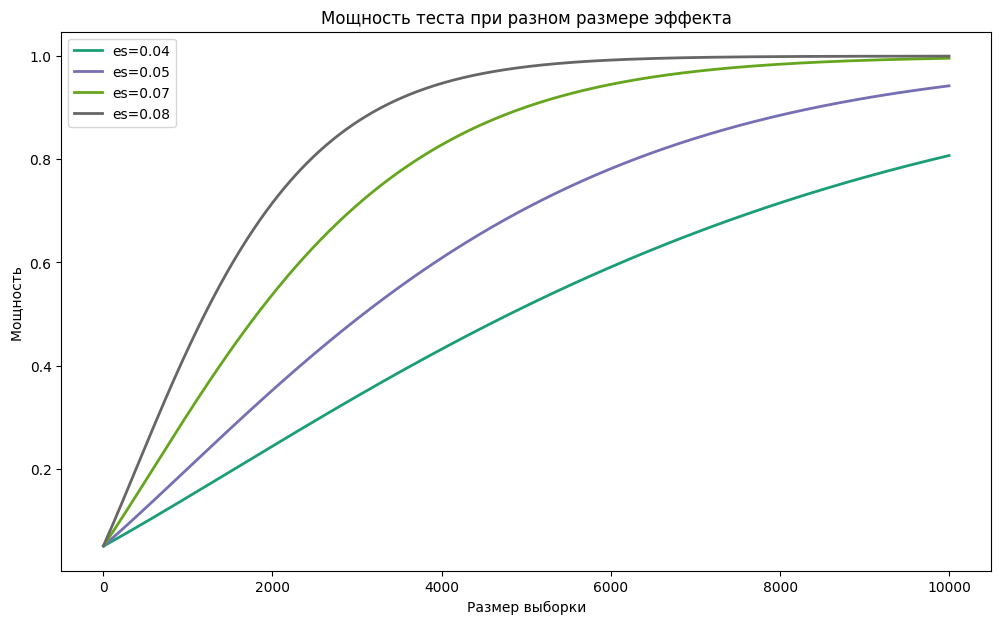

In [31]:

analysis = TTestIndPower()
effect_size = np.array([0.04, 0.05, 0.065, 0.08])
sample_size = np.arange(5, 10000, 10)
_, ax = plt.subplots(figsize=(12, 7))
analysis.plot_power(
    dep_var='nobs'
    , nobs=sample_size
    , effect_size=effect_size
    , alpha=0.05
    , ax = ax
)
ax.set_title('Мощность теста при разном размере эффекта')
ax.set_xlabel('Размер выборки')
ax.set_ylabel('Мощность ')
plt.legend()

In [32]:
import pandas as pd

In [34]:
df = pd.read_csv('experiment.csv', ).iloc[:, 1:]
df.head()

,control,test
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [36]:
df.shape

(1000, 2)

In [35]:
import statsmodels.stats.api as stm

In [41]:
ci_control = stm.DescrStatsW(df.control).tconfint_mean(0.1)
ci_test = stm.DescrStatsW(df.test).tconfint_mean(0.1)

In [42]:
ci_control

(0.4380230107984179, 0.48997698920158217)

In [43]:
ci_test

(0.5512661053339858, 0.6027338946660141)

Text(0.5, 1.0, 'Confidence Interval')

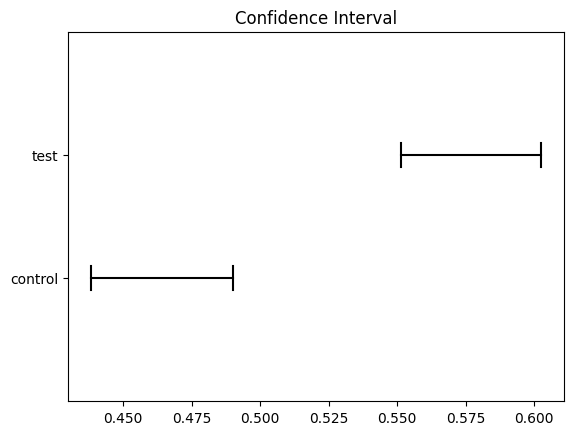

In [73]:
l_width = 0.1
y = 1
color = 'black'
plt.plot(ci_control, [y, y], c=color)
plt.plot([ci_control[0], ci_control[0]], [y - l_width, y + l_width], c=color)
plt.plot([ci_control[1], ci_control[1]], [y - l_width, y + l_width], c=color)
y = 2
plt.plot(ci_test, [y, y], c=color)
plt.plot([ci_test[0], ci_test[0]], [y - l_width, y + l_width], c=color)
plt.plot([ci_test[1], ci_test[1]], [y - l_width, y + l_width], c=color)
plt.yticks([1, 2], ['control', 'test'])
plt.ylim([0, 3])
plt.title('Confidence Interval')